In [1]:
# Import Python library for working with dataframes
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Enables inline display of plots within the Python Notebook (instead of having them pop up on new windows)
%matplotlib inline

# Display figures the same way they will be saved.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

# Import Python libraries for plotting
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    'figure.dpi': 300,
    "font.family": "serif",
})

In [2]:
# Load the dataset
# The ELLIPSE dataset ("ELLIPSE_Final_github.csv") can be downloaded from the following link: https://github.com/scrosseye/ELLIPSE-Corpus
df = pd.read_csv('../data/ELLIPSE_Final_github.csv')

In [3]:
df

,text_id_kaggle,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,...,task,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
0,5AA45740A848,"Dear, TEACHER_NAME\n\nI think phone policy at ...",Male,8,Hispanic/Latino,111,122,118,7,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,3.5,2.5,3.5,3.0,3.5,2.5
1,790891A35047,"Dear, Principal\r\n\r\nIn my opinion, I think ...",Female,8,Hispanic/Latino,99,105,102,6,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,4.0,3.5,3.0,3.5
2,C254D74362A3,PHONES\n\nDear principal students should have ...,Female,8,Hispanic/Latino,121,134,128,4,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,3.0,3.0,3.5,3.0
3,0985602832CD,phones\n\ni think phones should be allowed in ...,Male,8,Hispanic/Latino,182,202,192,2,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.0,2.5,3.0,3.0,3.0,2.5
4,3AB3FC197550,Do you really think students need cell phones ...,Female,8,Hispanic/Latino,192,210,201,11,4,...,Independent,Not economically disadvantaged,Cell phones at school,3.0,2.0,3.0,3.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,767E4FDAFFEA,To: Maganer of the Generic_City Florida Local ...,Female,8,Hispanic/Latino,684,711,709,25,7,...,Independent,Not economically disadvantaged,Letter to employer,4.0,3.5,3.5,4.0,3.5,3.5,3.5
6478,A937D1CDF5E1,"If people should make their own decisions, or ...",Male,11,White,262,307,296,17,9,...,Independent,Economically disadvantaged,Self-reliance,3.0,3.0,4.0,3.0,3.0,3.0,3.0
6479,1C17939C40A7,"I really like this quote because, i believe th...",Female,12,Black/African American,363,410,397,12,2,...,Independent,Economically disadvantaged,Individuality,2.0,2.5,2.5,2.0,2.0,2.0,2.0
6480,A84FFDD09442,The positive attitude is the key to success in...,Female,12,Hispanic/Latino,427,473,472,13,9,...,Independent,Not economically disadvantaged,Positive attitudes,3.0,3.0,2.0,3.5,3.0,2.5,3.0


In [4]:
df[['Grammar', 'Vocabulary']].describe()

,Grammar,Vocabulary
count,6482.000000,6482.000000
mean,3.029466,3.230947
std,0.689191,0.579543
min,1.000000,1.000000
25%,2.500000,3.000000
50%,3.000000,3.000000
75%,3.500000,3.500000
max,5.000000,5.000000


In [99]:
df[['Grammar', 'Vocabulary']].corr()

,Grammar,Vocabulary
Grammar,1.000000,0.650885
Vocabulary,0.650885,1.000000


In [5]:
# Print out the name of all columns in the dataframe
df.columns

Index(['text_id_kaggle', 'full_text', 'gender', 'grade', 'race_ethnicity',
       'num_words', 'num_words2', 'num_words3', 'num_sent', 'num_para',
       'num_word_div_para', 'MTLD', 'TTR', 'Type', 'Token', 'task', 'SES',
       'prompt', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions'],
      dtype='object')

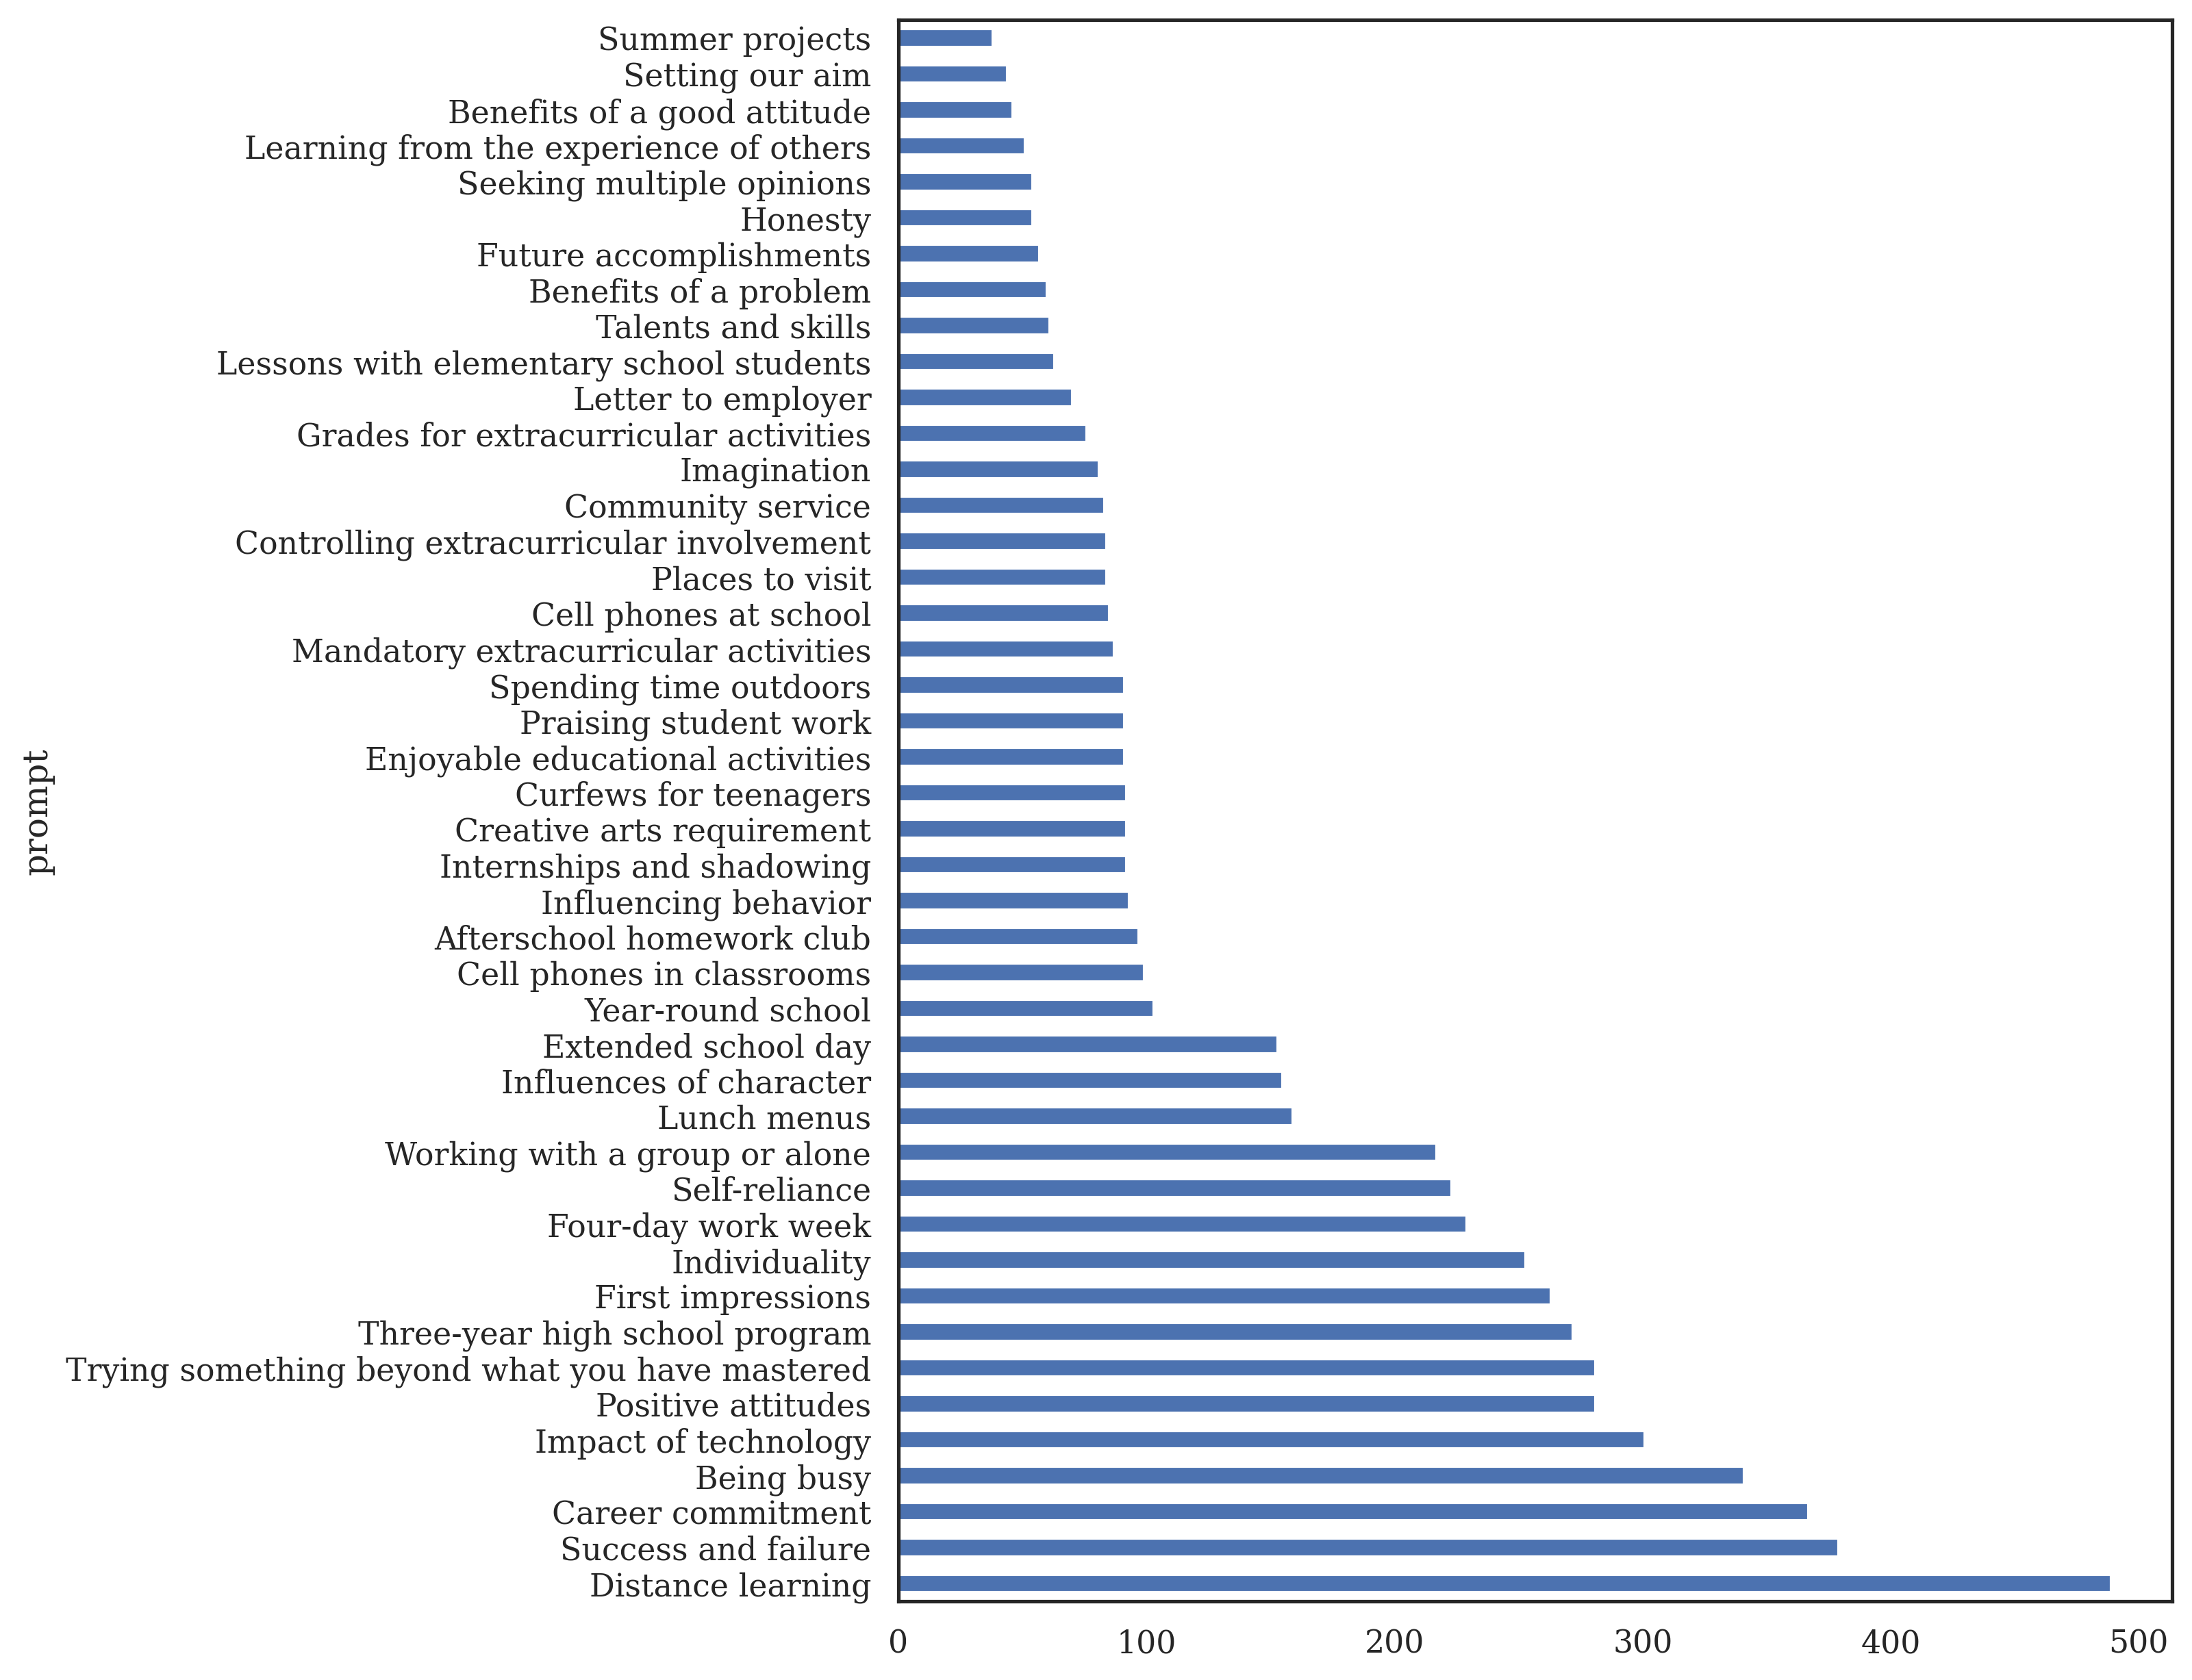

In [6]:
# Create a horizontal bar plot (bar'h') using the values in the 'prompt' column of the dataframe
# Semicolon is added at the end of the line to suppress some unwanted information from being printed
df.prompt.value_counts().plot.barh(figsize=(8,10));

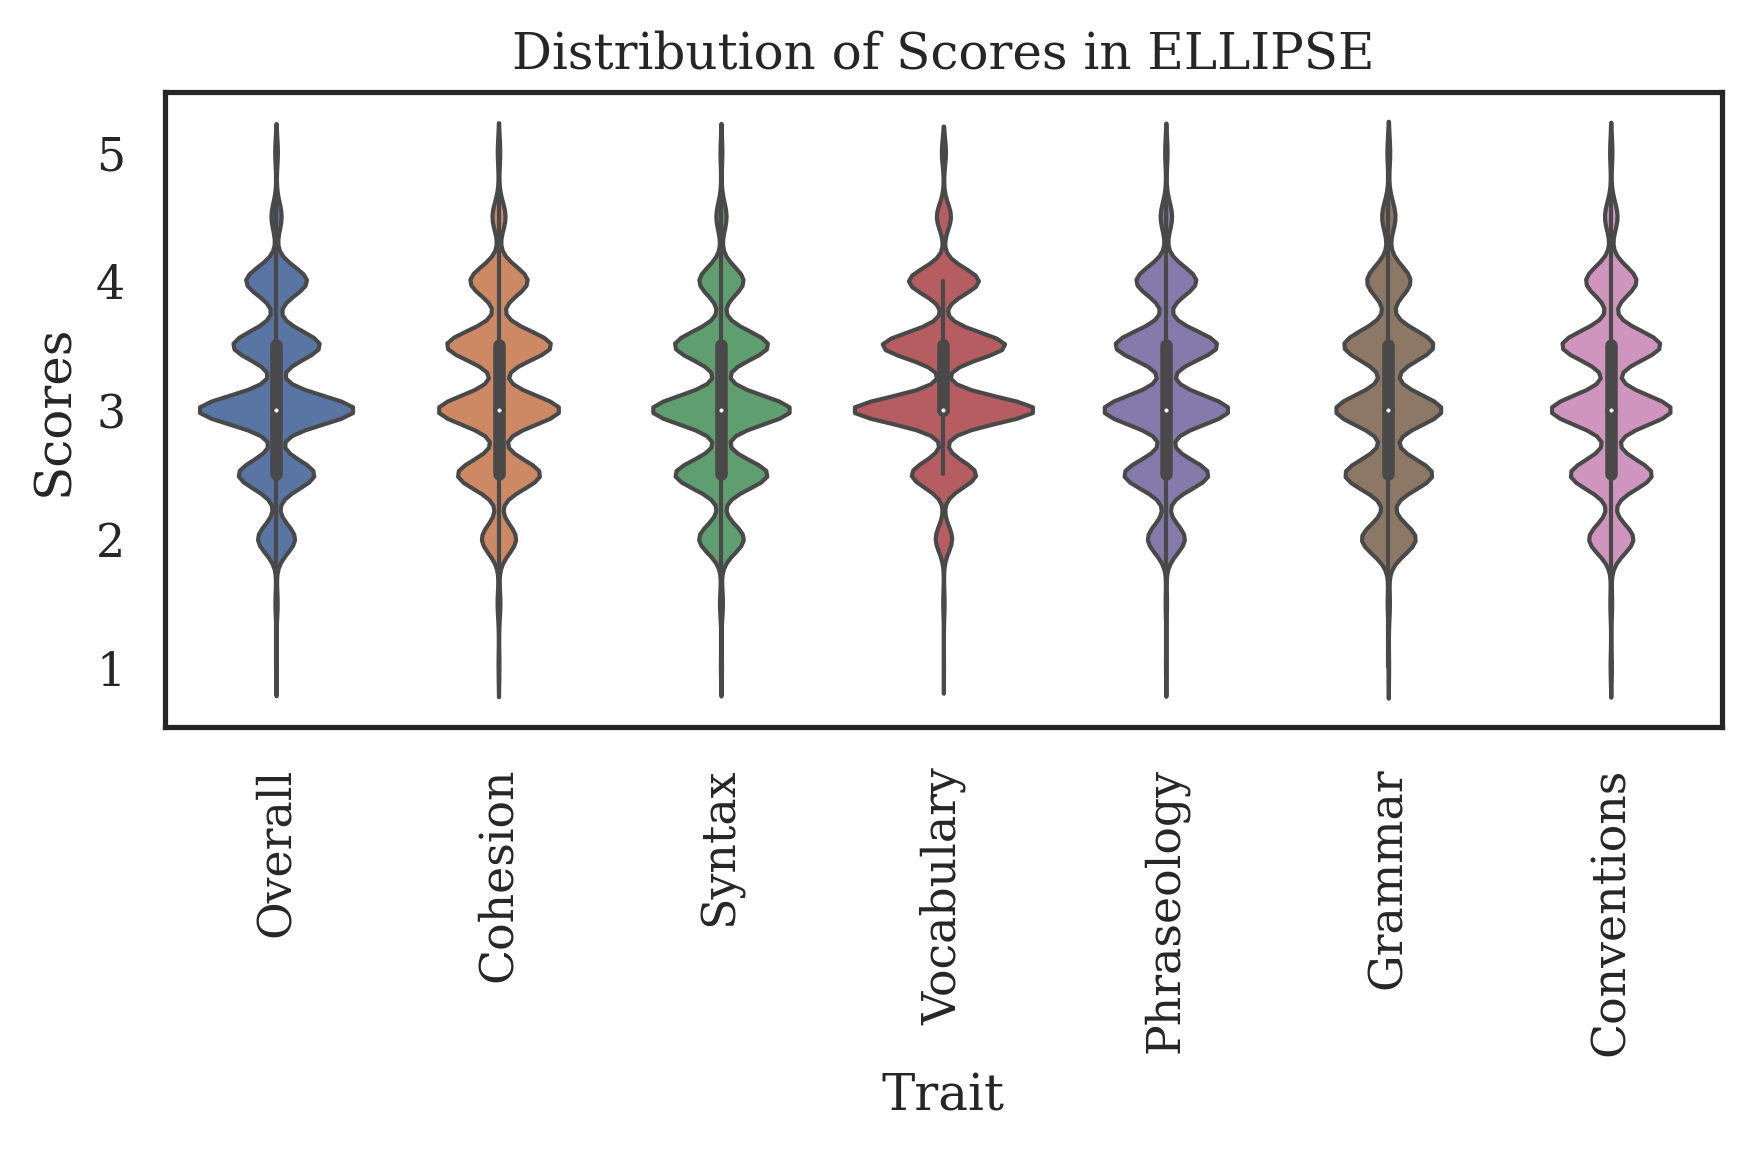

In [7]:
# Initialize list of variables that we are interested in inspecting and visualizing
scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']
categorical = ['race_ethnicity', 'gender', 'grade', 'SES']

# Initialize plot. Number inside the parentheses denote the plot's size in inches
f = plt.figure(figsize=(6, 4))

# Create violinplot that displays the distribution of different scores in the ELLIPSE corpus dataframe
g = sns.violinplot(x='variable', y='value',
                   data=df.melt(id_vars=['text_id_kaggle'], value_vars=scores),
                   linewidth=1,
                   inner='box',
                  )
for label in g.get_xticklabels():
    label.set_rotation(90)

# Change labels for x axis and y axis and title. Adjust paddings around the plot. 
g.set(xlabel='Trait', ylabel='Scores', title='Distribution of Scores in ELLIPSE')
f.tight_layout()

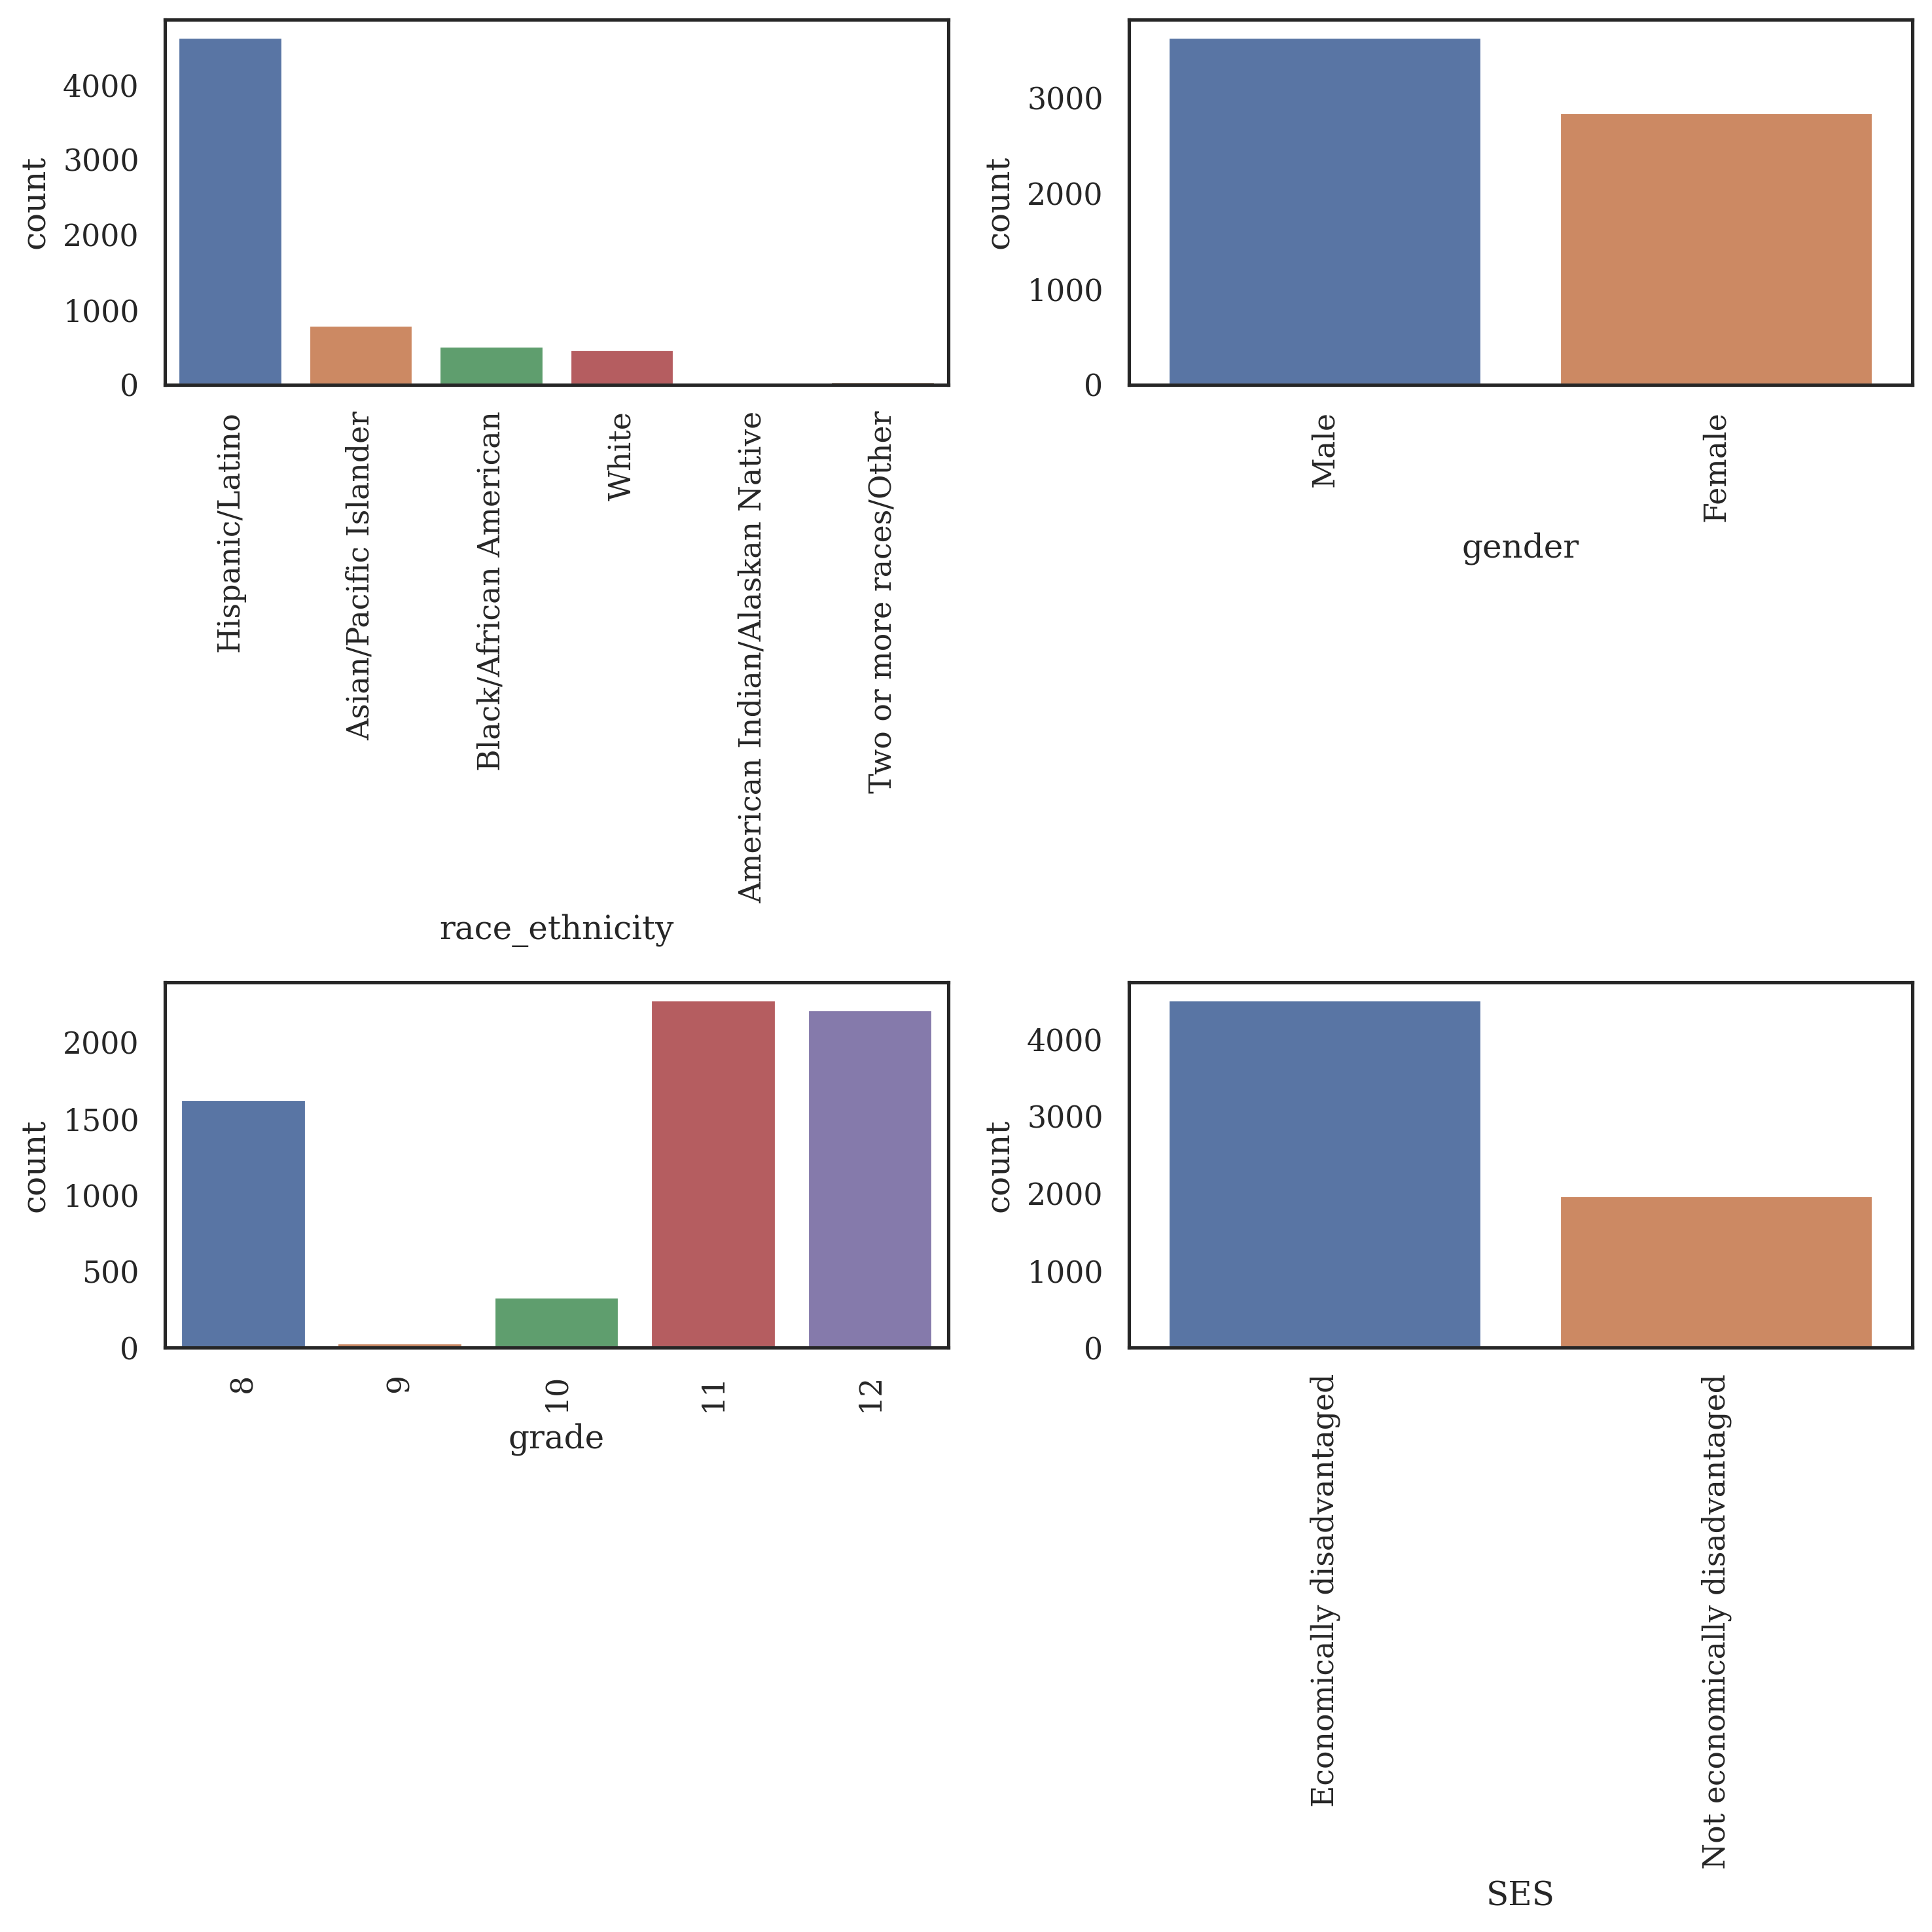

In [8]:
# Initialize new plots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over the different categories of demographic information using the list we created in the previous cell
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()

# Calculate Inter-rater reliability on the Final Dataset
We calculate the inter-rater reliability using Quadratic Weighted Kappa. The ELLIPSE dataset release paper reports Cohen's Kappas before on a pre-release version of the dataset (and provides a detailed multi-facet Rasch analysis for the final version), but we would like to know the inter-rater reliability of the final dataset in terms of a simple Kappa metric. We will use this to compare model-human IRR against human-human IRR.

We need the scores from each reviewer (before adjudication) to calculate the inter-rater reliability.

In [149]:
# This version of the data includes rater names
# We exclude these columns to prevent any names from being printed in the notebook
both_raters = pd.read_csv('../data/ell_raw_scores_0627.csv', usecols=lambda x: not x.startswith('Rater'))
# both_raters = pd.read_csv('../data/All_adjudicated_ELL_data_1022.csv', usecols=lambda x: not x.startswith('Rater'))

# We need to link the Filenames to the Kaggle IDs
both_keys = pd.read_csv('../data/ELLIPSE_Final_w_org_kaggle_id.csv', index_col=1, usecols=['text_id_kaggle', 'text_id_original'], dtype=str)

### Fix malformed text identifiers
As data is moved between programming languages and analysis softwares (Excel, R, Python, etc.), data types can become confused and malformed.

27 text IDs were misinterpreted as integers by one of these softwares and then saved as a string in the form '3.99E+11' or '3.98662E+11'. This happened at least twice, with different levels of precision each time. To realign the dataframes, we need to address this issue.

Luckily, since this only happened to 27 text IDs, the three numbers in "3.99E+11" are enough to uniquely identify all the documents.

In [150]:
print("Malformed in the final dataset:")
display(df[df.text_id_kaggle.str.contains('E\+')].text_id_kaggle.tail().to_frame())

print("Malformed in the dataframe that links different document identifiers:")
display(both_keys[both_keys.text_id_kaggle.str.contains('E\+')].text_id_kaggle.tail().to_frame())

Malformed in the final dataset:


,text_id_kaggle
5405,6.07E+11
5757,9.92E+12
5924,4.96E+11
6088,4.31E+11
6251,3.99E+11


Malformed in the dataframe that links different document identifiers:


,text_id_kaggle
text_id_original,
AAAXMP138200001051272104_OR,6.06503E+11
AAAXMP138200001471962810_OR,9.92E+12
AAAXMP138200001656692850_OR,4.96459E+11
AAAXMP138200001847862125_OR,4.30762E+11
AAAXMP138200002001322850_OR,3.98662E+11


### Re-create malformed identifiers

In [151]:
# Print how many samples contain 'E+' in the text_id_kaggle column
print("Samples with corrupted text_id_kaggle:", both_keys.text_id_kaggle.str.contains('E\+').sum())

# Construct a boolean indexer to pull these malformed IDs out
id_is_scientific_notation = both_keys.text_id_kaggle.str.contains('E\+')

# Wherever a malformed ID exists, convert it to a float then back to scientific notation with only 2 decimal places of precision
both_keys.loc[id_is_scientific_notation, 'text_id_kaggle'] = both_keys[id_is_scientific_notation].text_id_kaggle.astype(float).map(lambda x: f'{x:.2E}')

Samples with corrupted text_id_kaggle: 27


### Re-create original identifiers
Original identifiers are simply the filename minus the file extension. This is simple to fix.

Some samples went through a cleaning process. These are duplicated in the dataframe, so we need to identify and remove them.

We accomplish this by creating two boolean indexers. The first will tell us whether text_id_original is duplicated. The second will tell us whether the filename contains "_cleaned". We want to select the cleaned version of duplicate entries.

In [183]:
# Remove the file extension in the filename to get the original text id
# Some filenames looked like FILE_ID_cleaned.txt, so we use a regular expression to remove that as well
both_raters['text_id_original'] = both_raters['Filename'].str.extract(r'(.*?)(?:_cleaned)?.txt', expand=False)

# this creates a boolean index for all samples that have the same text_id_original as another sample
duplicated = both_raters.duplicated(subset=['text_id_original'], keep=False)

# this creates a boolean index for all samples that contain "_cleaned" in the filename
cleaned = both_raters.Filename.str.contains('_cleaned')

# this selects samples that are not duplicates, or (if they are duplicated), selects the cleaned version
both_raters = both_raters.loc[~duplicated | cleaned]

### Select all samples that were used in the final dataset

In [184]:
# map the text_id_original to text_id_kaggle
both_raters['text_id_kaggle'] = both_raters.text_id_original.map(both_keys['text_id_kaggle'])
both_raters = both_raters.loc[both_raters.text_id_kaggle.notnull()]

### Verify Data

Here, we `assert` that all samples in the final dataframe are also in `both_raters`. The `assert` statement will throw an error if the condition is not met.

For the equality check to work, we need to sort the values and drop the index from both Series.

In [185]:
assert (
    df
    .text_id_kaggle
    .sort_values()
    .reset_index(drop=True)
    .equals(
        both_raters
        .text_id_kaggle
        .sort_values()
        .reset_index(drop=True)
    )
)

In [186]:
both_raters

,Filename,Text,Overall_1,Cohesion_1,Syntax_1,Vocabulary_1,Phraseology_1,Grammar_1,Conventions_1,Identifying_Info_1,Overall_2,Cohesion_2,Syntax_2,Vocabulary_2,Phraseology_2,Grammar_2,Conventions_2,Identifying_Info_2,text_id_original,text_id_kaggle
1,2021000501.txt,"Dear, TEACHER_NAME\r\n\r\nI think phone policy...",3,3,2,3,3,3,2,0,3,4,3,4,3,4,3,0,2021000501,5AA45740A848
2,2021000535.txt,"Dear, Principal\r\n\r\nIn my opinion, I think ...",3,2,3,2,2,3,3,0,3,3,3,4,3,3,4,0,2021000535,790891A35047
3,2021000667.txt,PHONES\r\n\r\nDear principal students should h...,3,2,3,3,3,3,3,0,3,3,3,3,3,4,3,0,2021000667,C254D74362A3
4,2021000683.txt,phones\r\n\r\ni think phones should be allowed...,3,2,3,3,3,3,3,0,3,2,2,3,3,3,2,0,2021000683,0985602832CD
5,2021000705.txt,Do you really think students need cell phones ...,3,2,3,3,3,3,2,0,3,2,3,3,3,3,2,0,2021000705,3AB3FC197550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,AAAXMP138200002211022133_OR.txt,The decision regarding extracurricular involve...,4,4,4,3,4,4,4,0,4,4,4,4,4,4,5,0,AAAXMP138200002211022133_OR,F78366DD5A31
8885,AAAXMP138200002211062115_OR.txt,"The school plans to change to a new, healthier...",3,3,3,3,3,3,3,0,4,4,3,4,3,4,4,0,AAAXMP138200002211062115_OR,21741500885B
8886,AAAXMP138200002211752151_OR.txt,I raised by my grandparents and they always to...,4,4,3,4,4,3,4,0,4,4,3,4,4,3,4,0,AAAXMP138200002211752151_OR,56F9E8427D97
8888,AAAXMP138200002214212144_OR.txt,Imagine the world if students didn't complete ...,4,4,4,4,4,3,3,0,3,3,3,4,4,3,3,0,AAAXMP138200002214212144_OR,7D44F3E6C475


### Triple Check that we have the right data

The texts are not exactly the same across the two versions of the ELLIPSE dataset. This is because the data was cleaned before it was released by regularizing whitespace and removing strange unicode errors. We can still compare the texts to make sure they are roughly the same by using an edit distance. For this purpose, we import the Levenshtein package and ensure that the edit distance between the old version of the text and the new version of the text is greater than .80 (less than 20% of the characters need to inserted or deleted to make the texts identical). 

In [191]:
from Levenshtein import ratio

score_names = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']

def triple_check(train_df, new_df):
    train_df = train_df.sort_values(by=['text_id_kaggle']).reset_index(drop=True)
    new_df = new_df.sort_values(by=['text_id_kaggle']).reset_index(drop=True)
    for a, b in zip(train_df.itertuples(), new_df.itertuples()):
        # There are some minor differences between the text in these versions, mostly attributable to whitespace and strange unicode characters
        # An edit ratio of 0.80 is more than sufficient to confirm that these are the same texts
        text_a = re.sub("\s+", "", a.full_text)
        text_b = re.sub("[\sÂ]+", "", b.Text)
        assert ratio(text_a, text_b) > 0.80, f'{text_a}\n{"--"*80}\n{text_b}'
    print('Text and Text IDs all match.')

triple_check(df, both_raters)

Text and Text IDs all match.


## Calculate Kappas

In [147]:
for score in ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']:
    qwk = cohen_kappa_score(both_raters[f'{score}_1'], both_raters[f'{score}_2'], weights='quadratic')
    print(f'{score}: {qwk:.3f}')

Overall: 0.597
Cohesion: 0.585
Syntax: 0.581
Vocabulary: 0.530
Phraseology: 0.583
Grammar: 0.618
Conventions: 0.605


## Save the data

We will use this for calculating model-human QWK later.

In [59]:
both_raters.to_csv('../data/both_raters.csv', index=False)